In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
import jieba
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\大同106news.txt', './files\\大同附註.txt']

In [5]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ken\AppData\Local\Temp\jieba.cache
Loading model cost 1.044 seconds.
Prefix dict has been built succesfully.


In [6]:
stopwords = ['我', '對', '採用', '如下', '個體','10', '五年',  '相關','六年','部分','企業','之','於','註','係','民國','至','105.12','千元','資產','三十一日','期','負債','年','價值','按','7','12','有','年報','十二月','106.12','本集團','期間','計','所','集團','人','其','合','併','報導','等','已','時','100.00%','新','明','續','該','日','6','外','報告','股','財務','除','附','附錄','予','者','第','另','年度','本','○','臺','31','一','幣','後','大同','及','與','公司','單位','報表','公','司','為','月','有限公司','106','以','1','或','其他','金額','臺幣','1','2','3','4','5','000','認列','衡量','\n']
puncs = '！？｡/＂＃＄$％＆＇()（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [9]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus = []
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    for w in r_list:
        if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
            r_list.remove(w)        
    st=" ".join(r_list)
#     corpus[st]
    corpus.append(st)
corpus

['事件 內容 增資案 惹議 市場 派 提告 因現 金 增資 消息 曝光 股價 重挫 蒸發 億 市值 已經 損及 股東 權益 市場 派 股東 在 台北 地檢署 告發 再 重申 董事 會 決議 是 在 額定 股本 內 原 股東 的 現金 增資 從 未 涉入 股市 股價 是否 遭人為 操縱 無 從 得知 至於 日前 針對 股票 價格 波動 過度 劇烈 情事 依規定 自日 起 降低 融資 比率 一成 提高 融券 保證 金一成 市場 派 欣同 發聲明 指出 董事 會 通過 包括 每股 面額 元 辦理 現金 增資 億股 項 決議 表面 上 完成 增資 將可 改善 結構 強化 競爭力 但 億 股現 增案 雖 表示 發行 價格 暫時 未定 市場 消息 傳出 預定 將以 元 辦理 現增 由 市價 仍 元 導致 消息 一出 隔日 起 股價 連續 重挫 最低 點來 到 元 高院 判 林蔚山 需賠 億 最高院 發回 重審 投保 中心 控訴 董事 長 林蔚山 造成 損失 應予 賠償 台灣 高等法院 原判 決 林蔚山 共需 賠償 億元 但 最高 法院 廢棄 高院 的 原判 決 並發 回 重新 審理 最高法院 判決 理由 有項 尚志 資產給 通達 的 貸款 尚餘 萬未 清償 何以 持股 比例 計算 因此 所受 損害 萬 原審 並未 說明 理由 林蔚山 行為 無 造成 到 各 投資損 失達 億餘元 高院 未 調查 徒以 尚志 投資 以元 投資 通達 借貸 尚志 投資 尚志 投資 借貸 通達 的 款項 就認 定 損害 不無可議 高院 原 認定 尚志 投資 以元 投資 取得 通達 的 股份 不是 故 不 承受 該公 司損失 也 不是 受 損害 的 計算 基礎 若 果真如此 尚志 投資元 投資 通達 的 行為 是否 致 受 損害 尚非 無 疑 有關 增資 股款 溢價 發行 新股 股款 匯入 尚志 投資 原 審 逕 認 是 借 貸 違反 公司法 第條 第一 項規定 違背 的 忠 實及 注意 義務 不無認 作主 張事實 的 違法 通達 董事 會 決議 停業 如何 償 還銀行 款項 經與 銀行 溝通 及律 師建議 避免 影響 債信 由 原本 就是 連 保人 的 尚志 投資代償 原審 未加 審究 遽認 尚志 投資上 開行 是 林蔚山 指示 而 不利 的 判斷 並有 可議 高等法院 就 董事 長 因違 反證券 

In [10]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  5737


In [11]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (2, 5737)


<2x5737 sparse matrix of type '<class 'numpy.float64'>'
	with 5990 stored elements in Compressed Sparse Row format>

In [12]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,doc1_tfdif,doc2_tfdif
168,一一,0.000000,0.001677
169,一事,0.016512,0.000000
170,一二,0.000000,0.000559
171,一企業,0.000000,0.002235
172,一個,0.000000,0.004471
173,一個體,0.000000,0.000559
174,一元,0.000000,0.003912
175,一再,0.016512,0.000000
176,一出,0.016512,0.000000
177,一切正常,0.023497,0.001988


In [20]:
matrix=df_tfidf.drop(columns=['words'])
X = matrix.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X

array([[0.        , 0.00167661],
       [0.01651204, 0.        ],
       [0.        , 0.00055887],
       ...,
       [0.        , 0.00055887],
       [0.01651204, 0.        ],
       [0.        , 0.00111774]])

In [37]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [39]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 54.01746868, 100.        ])

In [22]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues 
[1.08054452 0.91981675]


In [23]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues 
[1.08034937 0.91965063]


In [24]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.91965063 1.08034937]


In [25]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [26]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.0803493735442606
0.9196506264557394


In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[54.01746867721303, 45.98253132278697]
[ 54.01746868 100.        ]


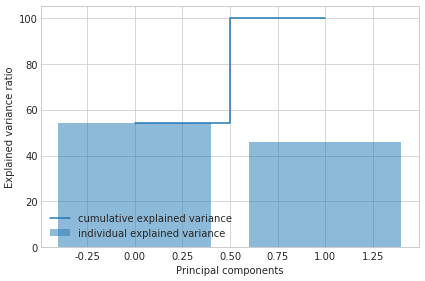

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [30]:
eig_pairs

[(1.0803493735442606, array([-0.70710678, -0.70710678])),
 (0.9196506264557394, array([-0.70710678,  0.70710678]))]

In [31]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1),))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [32]:
Y = X_std.dot(matrix_w.T)

In [48]:
matrix=df_tfidf.drop(columns=['words'])
X = matrix.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X

array([[0.        , 0.00167661],
       [0.01651204, 0.        ],
       [0.        , 0.00055887],
       ...,
       [0.        , 0.00055887],
       [0.01651204, 0.        ],
       [0.        , 0.00111774]])

In [49]:
pca = PCA(n_components=2)
x_7d = pca.fit_transform(X_std)

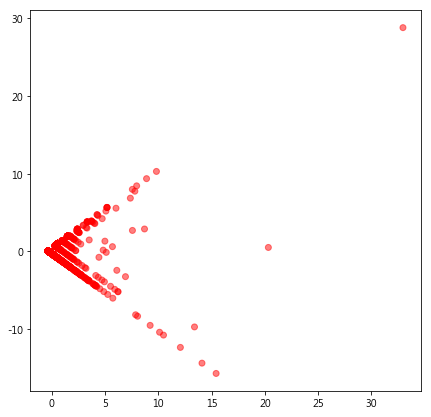

In [50]:
kmeans = KMeans(n_clusters = 1)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,1], c= label_color, alpha=0.5) 
plt.show()

In [52]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 6.35978777e-01,  5.43646041e-17],
       [-6.35978777e-01,  5.43646041e-17]])

No handles with labels found to put in legend.


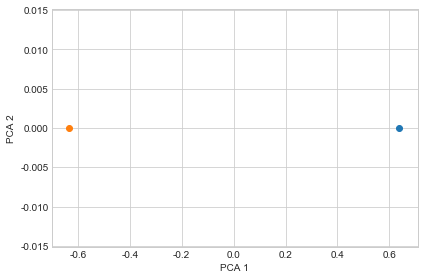

In [55]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()